# Descriptive Stats

#### Vorgaben

- Komplette Beschreibung ihres Datensatzes:
    - inklusive qualitativer und quantitativer Beschreibung der Variablen
    - allfälliger Zusammenhänge zwischen Variablenpaaren.
(Was bereits im Readme dokumentiert ist, muss nicht kopiert werden.)

#### Abgabe

**06. Dezember 2021**.

In [1]:
# Daten laden
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descriptive_stats as ds
df_a = ds.load_airports()
df_f = ds.load_flights()

### Allgemeine Beobachtungen des Datasets

#### Flugbewegungen
Als erstes möchten wir einen Überblick der Flughäfen erhalten. <br>
Der Datensatz beschreibt in der Spalte "IDENT" den ICAO-String, welches eine eindeutige Nummerierung des Flughafens beschreibt. Dabei bestimmt der erste Buchstabe die Region, der zweite das Land und die letzten Ziffern den spezifischen Flughafen. Wie unten ersichtlich, konnten viele Flughäfen nicht einer Region zugeordnet werden - wir behaupten dass viele dieser Flughäfen zu wenig Verkehr aufbieten, dass diese als Drehkreuze identifiziert werden.

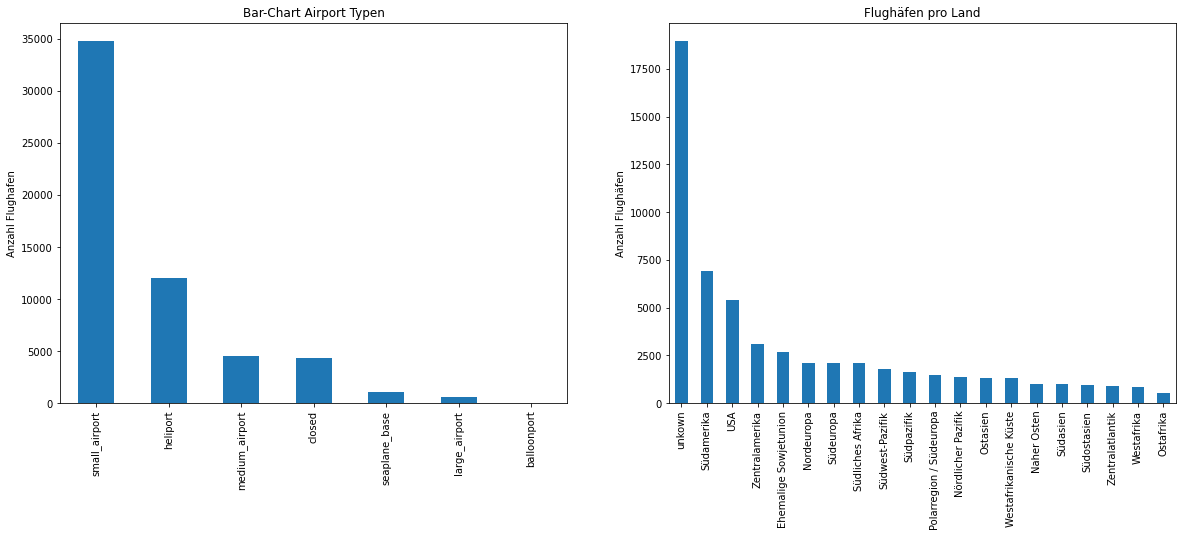

In [2]:
bar = ds.bar_category_region(df_a)

Die Flughäfen, welche keiner Region zugeordnet werden konnten besitzen Ihren ICAO-String bereits bevor die allgmeinen Bestimmungen gesetzt wurden. Beispielsweise ist "00A" ein Helikopterflughafen, welcher sogar nur aus 3 Ziffern besteht. Diese wurden aus historischer Sicht so beibehalten anstatt wie üblich ein K für Amerika vorzusetzten. <br><br>
Zur besseren Unterscheidung wollen wir diese Flughäfen ein wenig besser analysieren. 

In [3]:
print(ds.airport_infos(df_a))

Anzahl Flughafen total:	57421
Flughäfen für Flugzeuge:39961

Anzahl grosser Flughäfen: 616
Anzahl kleiner & mittlerer Flughäfen:   39345

Anzahl Flughäfen ohne Region/Continent: 42669
Durchschnitt der Takeoffs/Landings ohne Region/Continent: 33.789235067742105



Bevor wir die Lage des Datensets untersuchen, bestimmen wir die Kennzahlen der Flugbewegungen in Anbetracht der Flughäfen. Es ist zu erwähnen, dass Flugverbindungen ohne Standort (Origin oder Destination unklar), aussortiert wurden. 

In [4]:
print(ds.flight_infos(df_f))

Total FLugverbindungen: 3113109
Anzahl FLugverbindungen im Mai: 1493562
Anzahl FLugverbindungen im Sep: 1619547

Durchschnitt der Flugbewegungen
Median:	  55347.0
Mittelwert:53674.293103448275



### Lage
In diesem Abschnitt untersuchen wir die Lage der Daten anhand eines Diagramms, welches die Flugbewegungen pro Tag aufzeigt. Zusätzlich ist der Mittel- sowie Medianwert dieses Monates angegeben. 

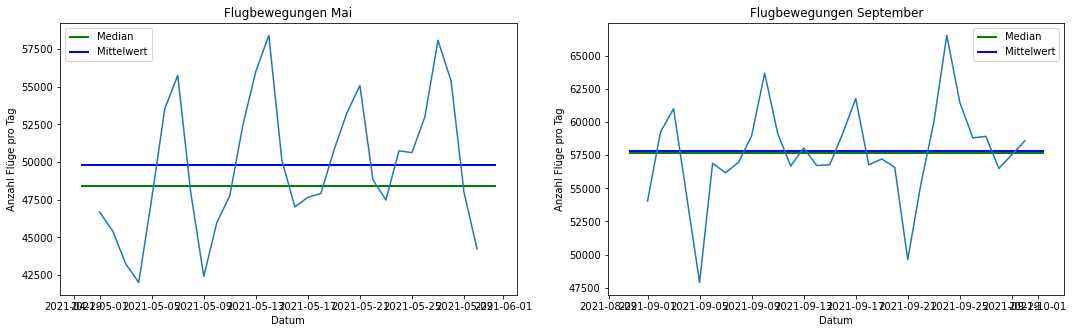

In [5]:
flight = ds.show_flights_seperate(df_f.loc[df_f['day'] < '2021-06-01'], df_f.loc[df_f['day'] > '2021-06-01'])

Der Lage der beiden Flugbewegungen sind ungefähr gleich. Im September ist das Flugaufkommen jedoch nochmals höher als im Mai.

Mai<br>
Median: 48416<br>
Mittel: 49785<br>

September<br>
Median: 57633<br>
Mittel: 57841

Uns intressiert dabei, die Verteilung dieser Flugbewegungen in Anbetracht eines Flughafens. Da wir rund 40'000 Flughäfen untersuchen welche in Frage kommen, betrachten wir ausschlieslich die Flughäfen, welche die meisten Flugbewegungen aufweisen:

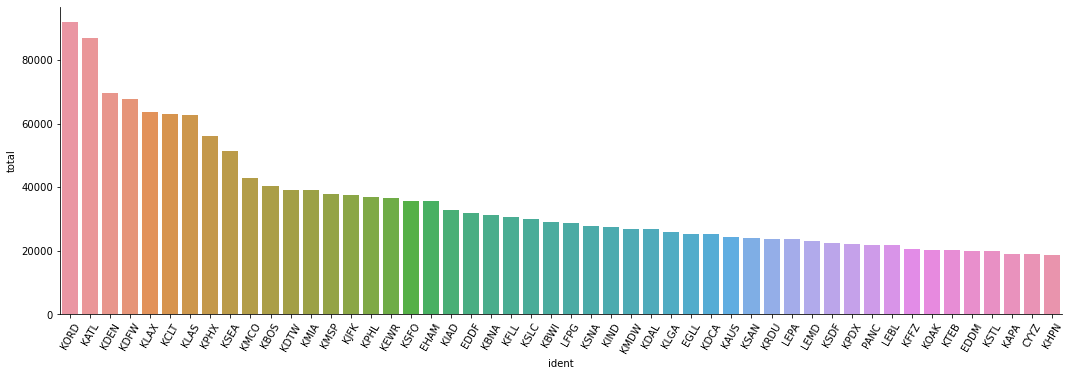

In [6]:
ds.show_distribution(df_a)

KORD und KATL sind die grössten internationale Flughäfen der Stadt Chicago und Atlanta welche im Vergleich zu anderen Flughäfen doppelt soviele Flugbewegungen wie der Durchschnitt aufweisen. Infolgedessen intressiert uns die Verteilung nach Region welche für die USA gross ausfallen dürfte.

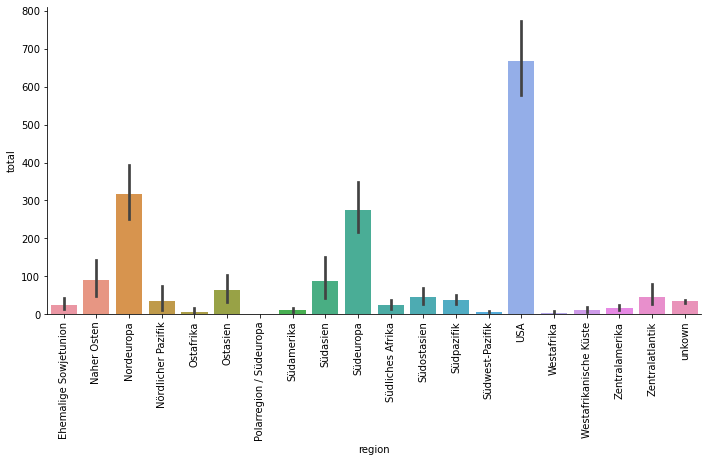

In [7]:
ds.show_distribution_region(df_a)

Wie angenommen, ist die Anzahl Flugbewegungen für die USA grösser als bei anderen Regionen. Letzlich weisen höchstens Nordeuropa zusammen mit Südeuropa ca. gleichviel Flugbewegungen auf wie die USA. 

### Streuung
In diesem Abschnitt untersuchen wir das Streuungsmass der Daten, um die Breite der Variablen zu bestimmen. Als Mass dient die Varianz und die Standardabweichung.

In [8]:
print("September:" + ds.get_varianz(df_f.loc[df_f['day'] > '2021-06-01'])) #September
print("\nMai: "+ ds.get_varianz(df_f.loc[df_f['day'] < '2021-06-01'])) #Mai

September:
Mittelwert: 57840.96428571428
Varianz: 13003928.67729592
Standardabweichung: 3606.096043825777
Max:66556 Min:47891

Mai: 
Mittelwert: 49785.4
Varianz: 19807757.706666667
Standardabweichung: 4450.590714350924
Max:58424 Min:42001


### Form
In Anbetracht der Lage sowie Median- und Mittelwert, können wir eine asymmetrische Verteilung erkennen, da Mittelwert und Median nicht gleich sind. Die Form dieser Verteilung zu untersuchen, gibt Aufschluss darüber, an welchem Tag bzw. Tagen am meisten los war. In folgender kumulativen Verteilungsfunktion ist keine asymetrie zu erkennen.

<AxesSubplot:title={'center':'Verteilung September'}, xlabel='Datum', ylabel='Kumulative Verteilung'>

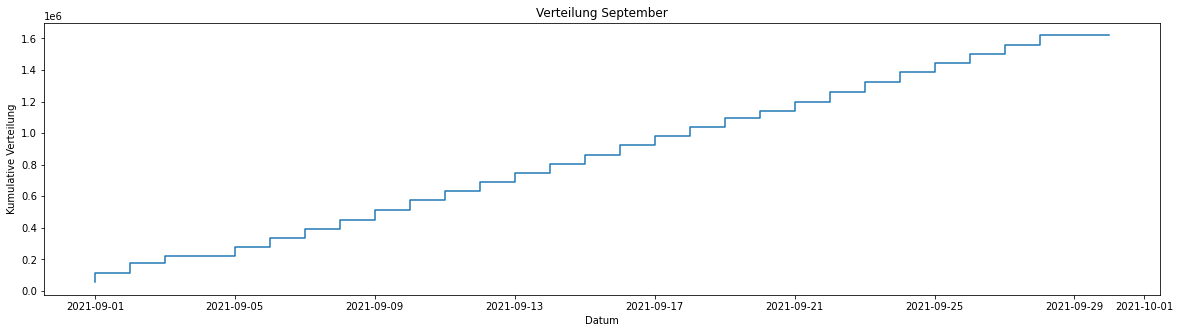

In [9]:
ds.show_cum_flights(df_f.loc[df_f['day'] > '2021-06-01'], "Verteilung September")

<AxesSubplot:title={'center':'Verteilung Mai'}, xlabel='Datum', ylabel='Kumulative Verteilung'>

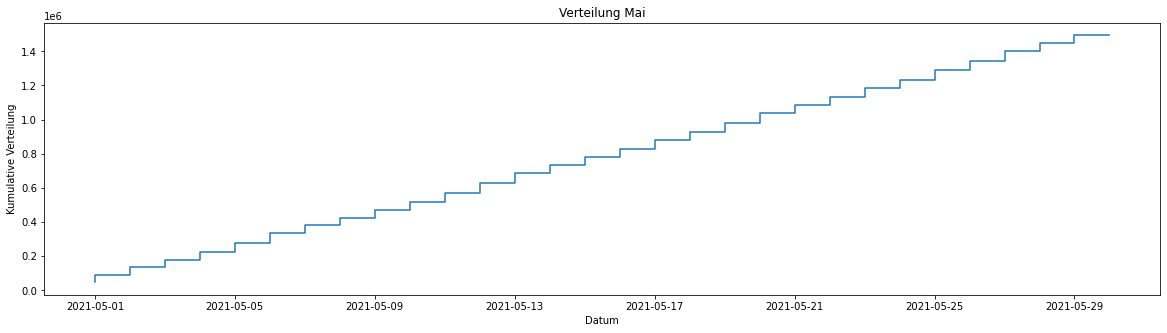

In [10]:
ds.show_cum_flights(df_f.loc[df_f['day'] < '2021-06-01'], "Verteilung Mai")